<a href="https://colab.research.google.com/github/Prateek-sinha-08/DL/blob/main/First_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

# **Reading the dataset**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Independent and dependent variables**

In [5]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

# **Basic feature exploration & engineering**

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [9]:
x=pd.concat([x,geography,gender],axis=1)

In [10]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False


In [11]:
x.shape

(10000, 13)

In [12]:
x.size

130000

In [13]:
x=x.drop(['Geography','Gender'],axis=1)

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()

In [16]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

Important Deep Learning Libraries for creating Neural Networks

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [18]:
classifier= Sequential()

In [19]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [20]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [21]:
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [22]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
model_history=classifier.fit(xtrain,ytrain,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 8s 9ms/step - loss: 0.5943 - accuracy: 0.7544 - val_loss: 0.4997 - val_accuracy: 0.8012
Epoch 2/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4725 - accuracy: 0.8117 - val_loss: 0.4579 - val_accuracy: 0.8092
Epoch 3/100
536/536 [==============================] - 7s 14ms/step - loss: 0.4427 - accuracy: 0.8199 - val_loss: 0.4419 - val_accuracy: 0.8217
Epoch 4/100
536/536 [==============================] - 9s 16ms/step - loss: 0.4307 - accuracy: 0.8250 - val_loss: 0.4342 - val_accuracy: 0.8201
Epoch 5/100
536/536 [==============================] - 7s 13ms/step - loss: 0.4213 - accuracy: 0.8248 - val_loss: 0.4251 - val_accuracy: 0.8228
Epoch 6/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4129 - accuracy: 0.8291 - val_loss: 0.4198 - val_accuracy: 0.8228
Epoch 7/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4061 - accuracy: 0.8306 - val_loss: 0.4078 - val_accuracy: 0.8

As we can see clearly we got the accuracy of .8614, which is actually OK.

In [24]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb

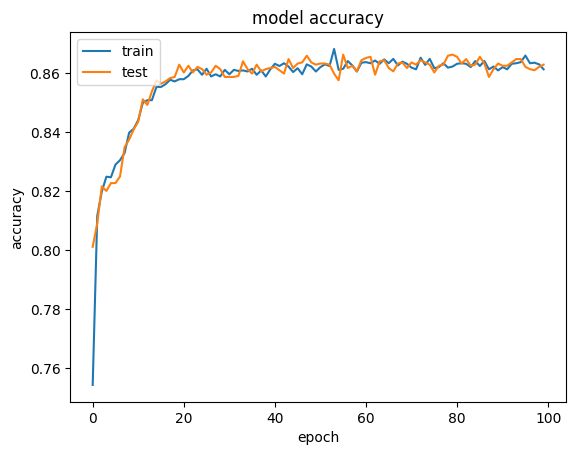

In [26]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Visualizing model accuracy

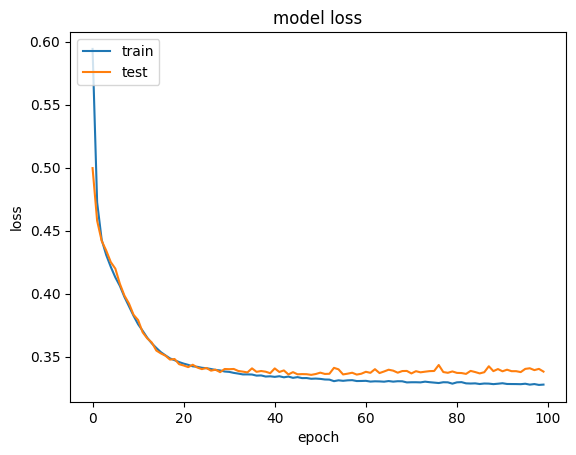

In [27]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
ypred=classifier.predict(xtest)

63/63 [==============================] - 1s 5ms/step


In [29]:
ypred=(ypred>0.5)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm=confusion_matrix(ytest,ypred)

In [32]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ypred,ytest)

In [33]:
score

0.8535

<Axes: >

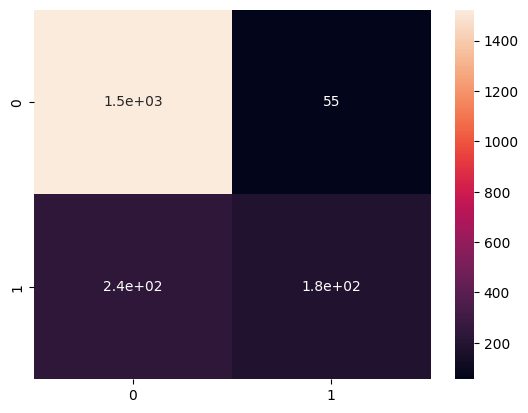

In [34]:
sb.heatmap(cm,annot=True)